In [73]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import quandl
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [74]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

#EIA API call to use
#1.Total Energy Consumed by the Residential Sector, Monthly
http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=TOTAL.TERCBUS.M
#2.Total Energy Consumed by the Commercial Sector, Monthly
http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=TOTAL.TECCBUS.M
#3Total Energy Consumed by the Industrial Sector, Monthly
http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=TOTAL.TEICBUS.M
#4.Total Energy Consumed by the Transportation Sector, Monthly
http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=TOTAL.TEACBUS.M

In [75]:
import pandas as pd

eia_key='9c350f43a8bd4616f38047d7cf6bfe01'

def link_category(id_number):
    return 'http://api.eia.gov/category/?api_key='+eia_key+'&category_id='+id_number

def link_series(id_number):
    return 'http://api.eia.gov/series/?api_key='+eia_key+'&series_id='+id_number


'''Total Energy Consumed by the Residential Sector, Monthly'''

page=link_series('TOTAL.TXRCBUS.M')

In [76]:
import json, requests
#Total Primary Energy Consumed by the Residential Sector, Monthly
d = json.loads(requests.get(page).text)
df = pd.DataFrame(d['series'][0]['data'], columns=['Period', 'Value'])
#reindexing the period column to date format
#df['Period'] = pd.to_datetime(df.loc[df['Period'].str[-2:] != '13','Period'], format='%Y%m', errors='coerce')
df.head()

,Period,Value
0,201801,1187.862
1,201712,1003.242
2,201711,610.553
3,201710,323.729
4,201709,224.319


In [77]:
#Total Primary Energy Consumed by the Commercial Sector, Monthly
page1=link_series('TOTAL.TXCCBUS.M')
d1 = json.loads(requests.get(page1).text)
df1 = pd.DataFrame(d1['series'][0]['data'], columns=['Period', 'Value1'])
df1.tail()

,Period,Value1
536,197305,289.109
537,197304,362.003
538,197303,490.154
539,197302,621.766
540,197301,656.607


In [78]:
#Total Primary Energy Consumed by the Industrial Sector, Monthly
page2=link_series('TOTAL.TXICBUS.M')
d2 = json.loads(requests.get(page2).text)
df2 = pd.DataFrame(d2['series'][0]['data'], columns=['Period', 'Value2'])
df2.tail()

,Period,Value2
536,197305,2070.447
537,197304,1924.207
538,197303,1944.295
539,197302,1869.459
540,197301,2054.675


In [79]:
#Total Primary Energy Consumed by the Transportation Sector, Monthly
page3=link_series('TOTAL.TXACBUS.M')
d3 = json.loads(requests.get(page3).text)
df3 = pd.DataFrame(d3['series'][0]['data'], columns=['Period', 'Value3'])
df3.head()

,Period,Value3
0,201801,2247.868
1,201712,2370.066
2,201711,2312.803
3,201710,2409.262
4,201709,2309.128


In [80]:
#Total Primary Energy Consumed by the Elecetric Power Sector, Monthly
page4=link_series('TOTAL.TXEIBUS.M')
d4 = json.loads(requests.get(page4).text)
df4 = pd.DataFrame(d4['series'][0]['data'], columns=['Period', 'Value4'])
df4.head()

,Period,Value4
0,201801,3473.928
1,201712,3214.833
2,201711,2860.104
3,201710,2963.801
4,201709,3104.884


In [81]:
#Join all 5 data sets
frames = [df, df1, df2, df3, df4]
df_join=reduce(lambda left,right: pd.merge(left,right,on='Period'), frames,)
df_join.columns= ( 'Period','Resid', 'Comm', 'Indst', 'Trans', 'Elect')
df_join.head()

,Period,Resid,Comm,Indst,Trans,Elect
0,201801,1187.862,693.809,2069.869,2247.868,3473.928
1,201712,1003.242,619.693,1951.520,2370.066,3214.833
2,201711,610.553,431.951,1896.194,2312.803,2860.104
3,201710,323.729,294.991,1819.036,2409.262,2963.801
4,201709,224.319,230.470,1754.965,2309.128,3104.884


#reindexing the period column to date format
from datetime import datetime
df_join['Period'] = pd.to_datetime(df_join.loc[df_join['Period'].str[-2:] != '13','Period'], format='%Y%m',
                                   errors='ignore')


In [82]:
df_join['Period'] = pd.to_datetime(df_join.loc[df_join['Period'].str[-2:] != '13','Period'], format='%Y%m', errors='coerce')

In [83]:
df_join.head()

,Period,Resid,Comm,Indst,Trans,Elect
0,2018-01-01,1187.862,693.809,2069.869,2247.868,3473.928
1,2017-12-01,1003.242,619.693,1951.520,2370.066,3214.833
2,2017-11-01,610.553,431.951,1896.194,2312.803,2860.104
3,2017-10-01,323.729,294.991,1819.036,2409.262,2963.801
4,2017-09-01,224.319,230.470,1754.965,2309.128,3104.884


In [84]:
#Set Period as date index
from datetime import datetime
#df_join.set_index('Period', inplace=True)
df_join.Period= pd.to_datetime(df_join.Period)


In [85]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 6 columns):
Period    541 non-null datetime64[ns]
Resid     541 non-null float64
Comm      541 non-null float64
Indst     541 non-null float64
Trans     541 non-null float64
Elect     541 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 29.6 KB


google.price.plot(title='Google Stock Price')
plt.tight_layout(); plt.show()
google['2015'].info() # Pass string for part of date
 google['2015-3': '2016-2'].info() # Slice includes last month
 google.loc['2016-6-1', 'price'] # Use full date with .loc[]
  google.asfreq('D').info() # set calendar day frequency
   google = google.asfreq(‘B') # Change to calendar day frequenc
  google[google.price.isnull()] # Select missing ‘price’ values
 

In [86]:
#Checking if there is any missing value
def ShowMissing(df_join):
    num_missing = df_join.isnull().sum().sort_values(ascending=False)
    missing_percent = (100*df_join.isnull().sum()/df_join.isnull().count()).sort_values(ascending=False)
    missing_num_percent = pd.concat([num_missing, missing_percent], axis=1, 
                                    keys=['num_missing', 'missing_percent'])
    return missing_num_percent

In [87]:
missing_num = ShowMissing(df_join)
missing_num

,num_missing,missing_percent
Elect,0,0.0
Trans,0,0.0
Indst,0,0.0
Comm,0,0.0
Resid,0,0.0
Period,0,0.0


In [16]:
df_join.describe()

,Resid,Comm,Indst,Trans,Elect
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,587.003349,341.162619,1801.957527,1974.232253,2665.116856
std,304.687178,143.034406,151.191331,295.384986,613.738194
min,203.649000,167.183000,1465.155000,1339.339000,1470.152000
25%,316.790000,210.428000,1701.104000,1699.934000,2113.682000
50%,491.557000,289.109000,1798.950000,1982.363000,2733.381000
75%,858.959000,470.629000,1896.194000,2246.021000,3109.330000
max,1447.095000,696.361000,2274.070000,2533.896000,4084.460000


It seems that the most energy consumption occurred at industrial sectors in the U.S.

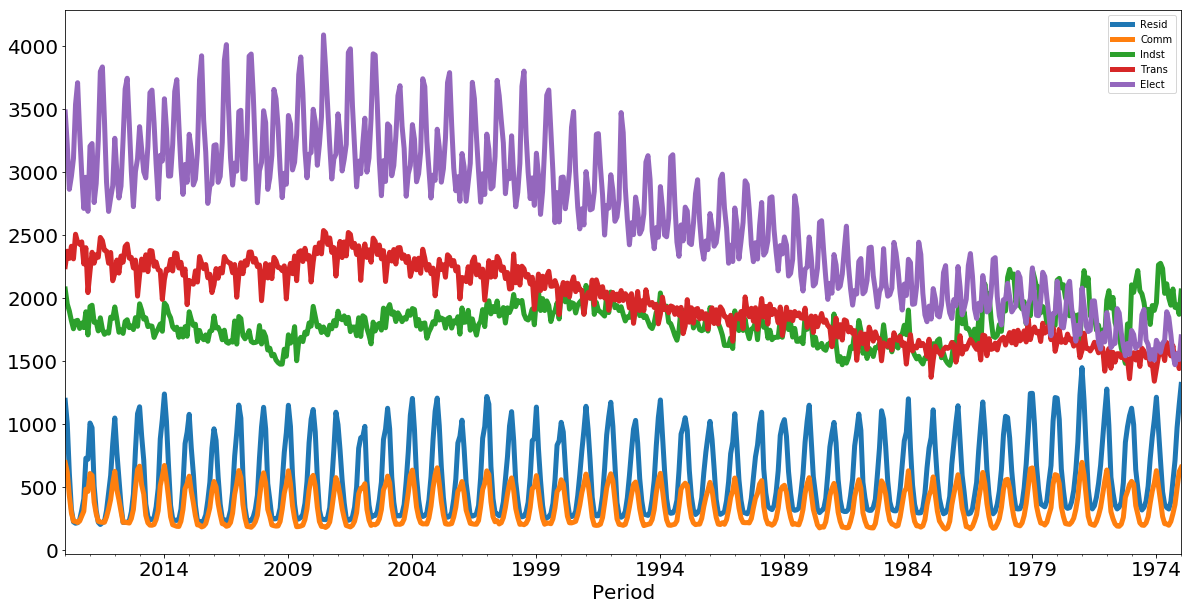

In [17]:
import matplotlib.pyplot as plt
df_join.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Period', fontsize=20);
plt.show()

In [18]:
#Compute the correlation coefficients of all of these time series with the help of .corr()
df_join.corr()

,Resid,Comm,Indst,Trans,Elect
Resid,1.000000,0.984101,0.300320,-0.226222,-0.227332
Comm,0.984101,1.000000,0.322314,-0.097060,-0.106918
Indst,0.300320,0.322314,1.000000,0.011314,-0.048714
Trans,-0.226222,-0.097060,0.011314,1.000000,0.912502
Elect,-0.227332,-0.106918,-0.048714,0.912502,1.000000


In [67]:
df_join['Elect'].corr(df_join['Resid'])

-0.0083059486933196713

In [68]:
df_join['Elect1'] = df_join['Elect'].pct_change()
df_join['Resid1'] = df_join['Resid'].pct_change()

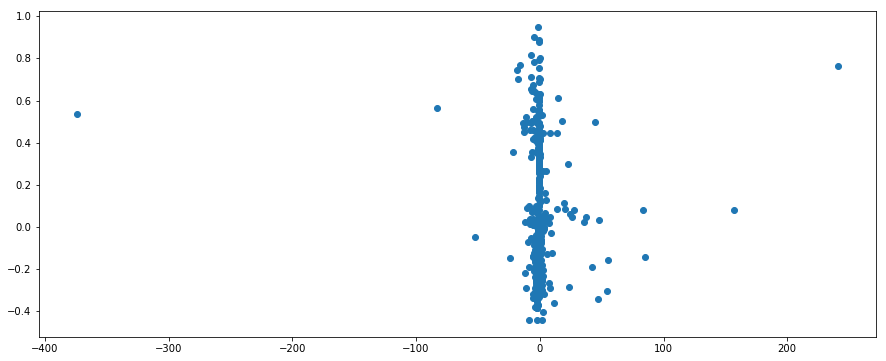

In [69]:
plt.scatter(df_join['Elect1'], df_join['Resid1'])
plt.show()

In [71]:
correlation = df_join['Elect1'].corr(df_join['Resid1'])
print("Correlation is: ", correlation)


('Correlation is: ', -0.03748981533095852)


Numbers represent energy consumption relative to the highest point on the chart for given sector and time. 
There looks to be an increasing trend in electric power sector over time.
There do not appear to be any obvious outliers, although there are some large fluctuations.
There is a downward trend for the last few years of the series.
Trends in consumption of electric power sector follows different patterns compare to others. 

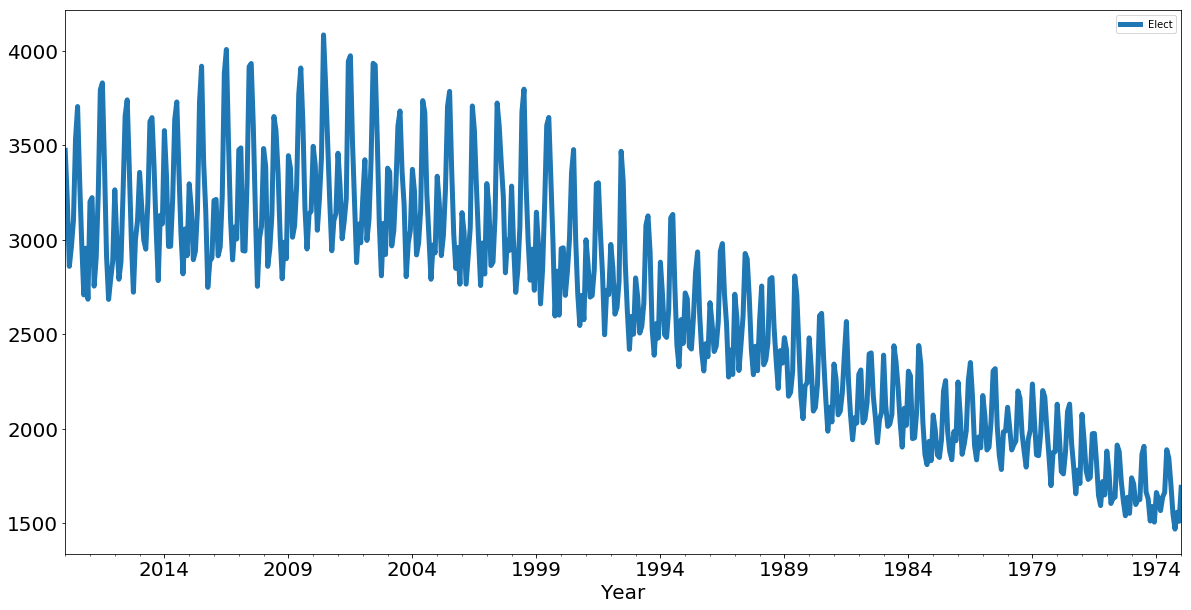

In [54]:
#Plot Primary Electric Power Sector by itself as time series
import matplotlib.pyplot as plt
df_join[['Elect']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

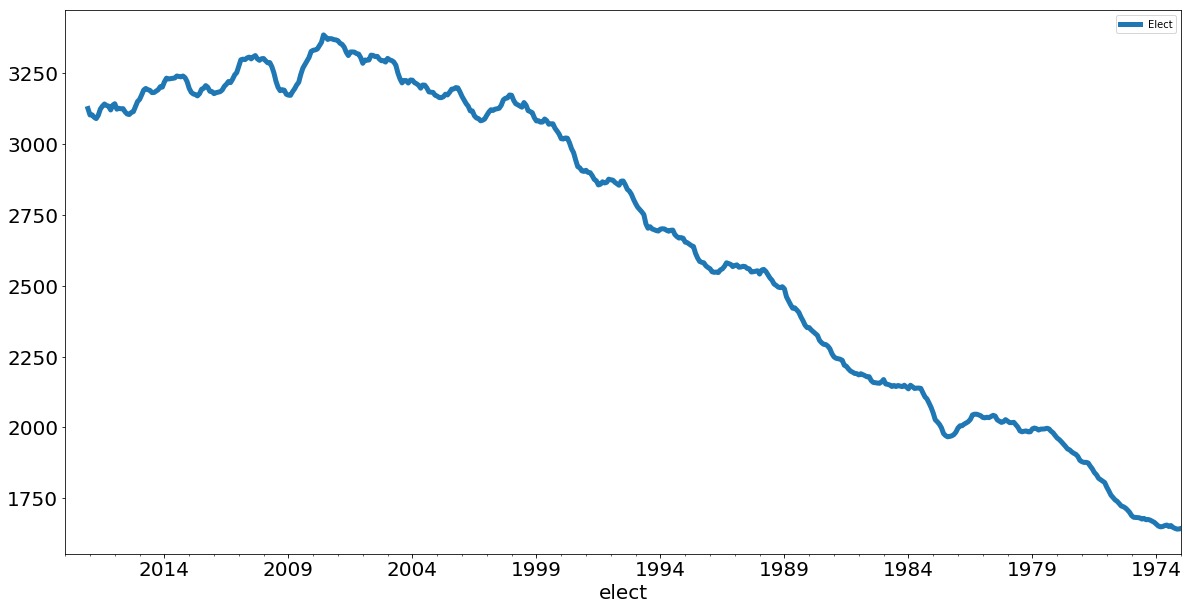

In [20]:
elect = df_join[['Elect']]
elect.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('elect', fontsize=20);

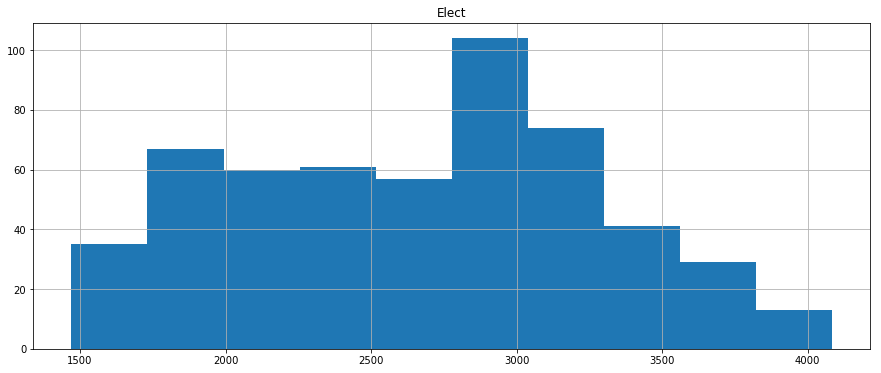

In [42]:
from pandas import Series
from matplotlib import pyplot
elect.hist()
pyplot.show()

In [43]:
X = elect.values
split = len(X) / 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3165.574878, mean2=2166.505542
variance1=112807.627920, variance2=140030.619182


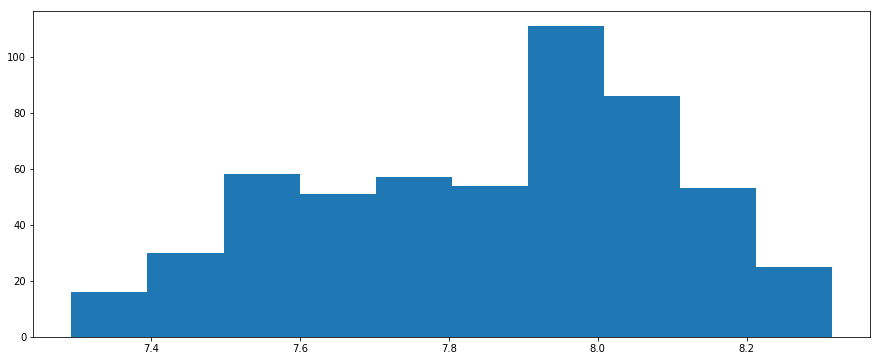

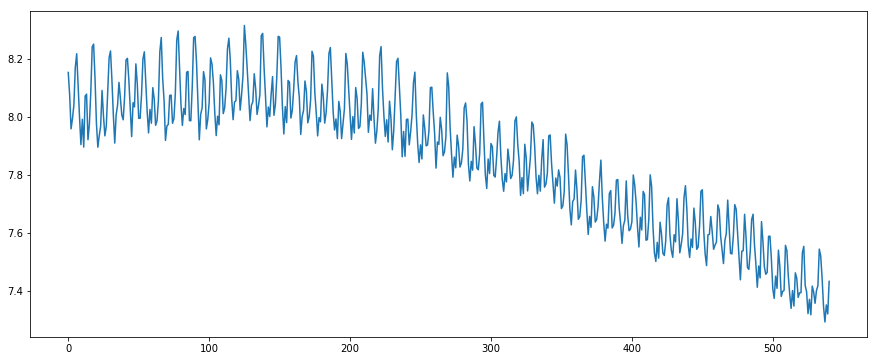

In [45]:
from numpy import log
X = elect.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [52]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
X = elect.values
result = adfuller(X)
print('p-value: %f' % result[1])


ValueError: too many values to unpack

In [21]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.
Stationary Time Series
The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

# Checks for Stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

In [88]:
def TestStationaryPlot(ts):
    rol_mean = elect.rolling(window = 12, center = False).mean()
    rol_std = elect.rolling(window = 12, center = False).std()
    
    plt.plot(elect, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Energy Consumption', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [89]:
def TestStationaryAdfuller(elect, cutoff = 0.01):
    elect_test = adfuller(elect, autolag = 'AIC')
    elect_test_output = pd.Series(elect_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in elect_test[4].items():
        elect_test_output['Critical Value (%s)'%key] = value
    print(elect_test_output)
    
    #if elect_test[1] <= cutoff:
        #print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
   # else:
       # print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

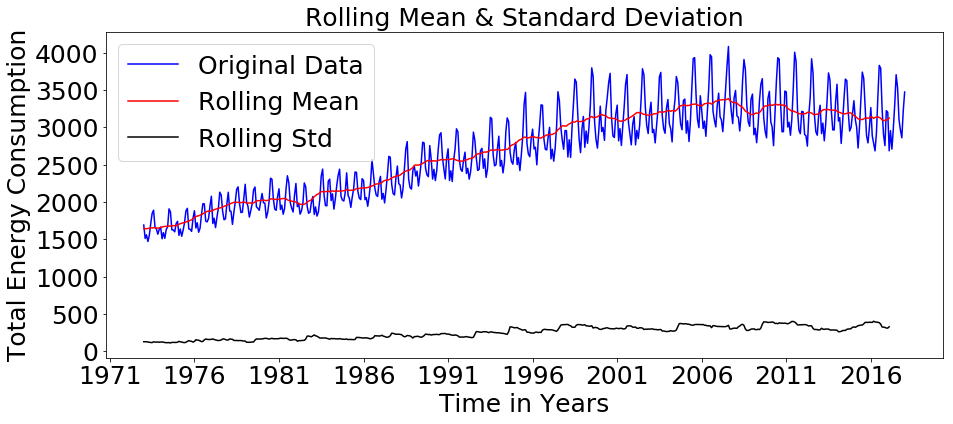

In [90]:
TestStationaryPlot(elect)

In [91]:
TestStationaryAdfuller(elect)

ValueError: too many values to unpack

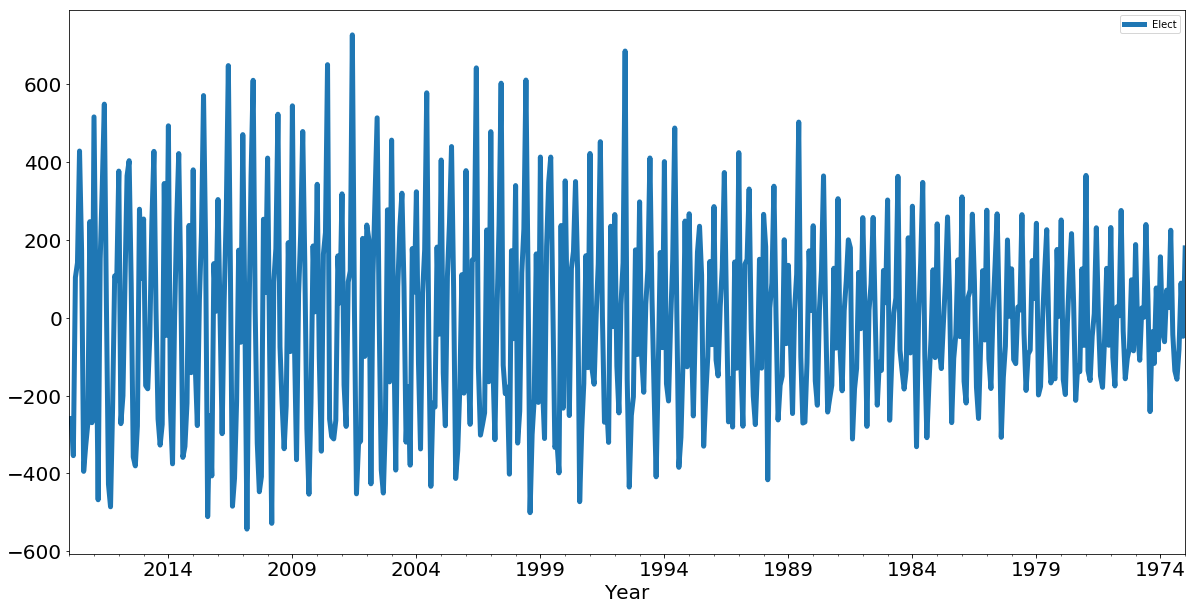

In [335]:
#Performing first order of differencing in terms of exploring seasonalities.
elect.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

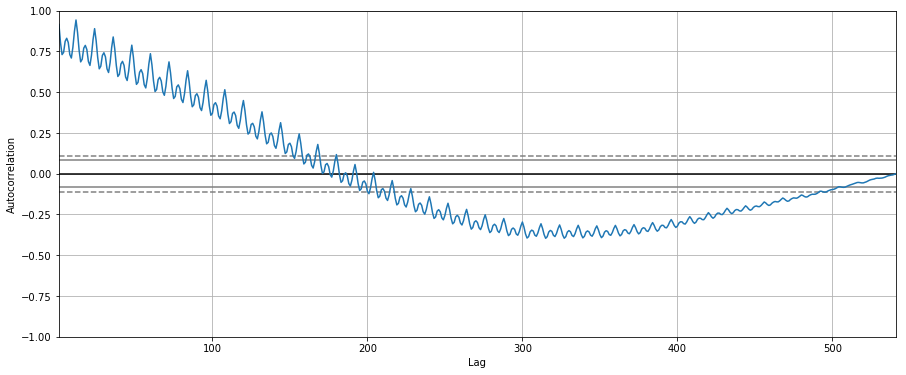

In [26]:
#Autocorrelation of indst(Primary Energy consumption in Electric Power Sector)
pd.plotting.autocorrelation_plot(elect);

The lag is participated on x-axis and on the y-axis, we have how correlated the time series is with itself at that lag. The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months. You have identified the seasonality of this 12 month repetition!
A good starting point for the AR parameter of the model may be 60.

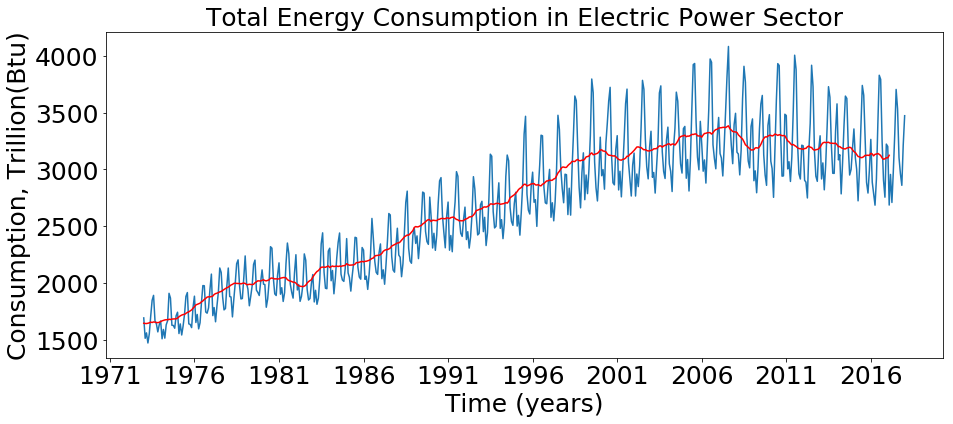

In [128]:
moving_avg = elect.rolling(12).mean()
plt.plot(elect)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('Consumption, Trillion(Btu)', fontsize = 25)
plt.title('Total Energy Consumption in Electric Power Sector', fontsize = 25)
plt.show()

The red line shows the rolling mean. Subtract the moving average from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [129]:
elect_moving_avg_diff = elect - moving_avg
elect_moving_avg_diff.head()

,Elect
Period,
2018-01-01,NaN
2017-12-01,NaN
2017-11-01,NaN
2017-10-01,NaN
2017-09-01,NaN


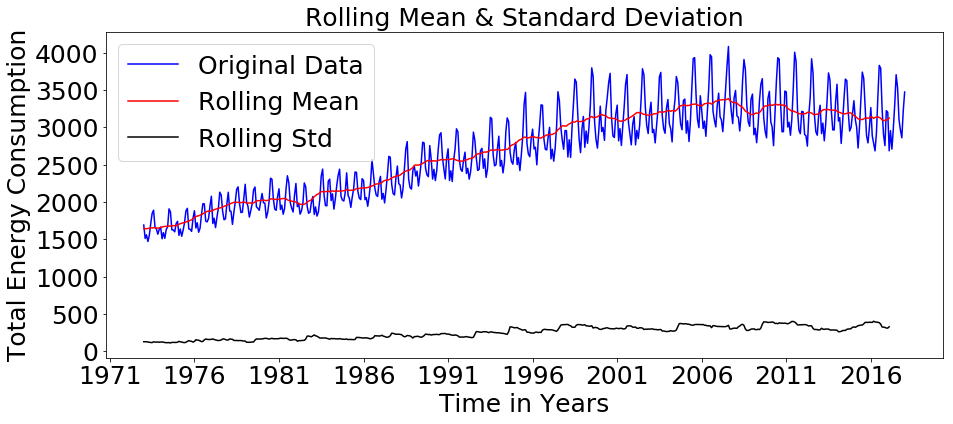

In [130]:
elect_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(elect_moving_avg_diff)

In [131]:
TestStationaryAdfuller(elect_moving_avg_diff)

ValueError: too many values to unpack

In [ ]:
#Eliminating the the trend and seasonality
elect_first_difference = elect - elect.shift(1)  
TestStationaryPlot(elect_first_difference.dropna(inplace=False))

In [ ]:
elect_seasonal_difference = elect - elect.shift(12)  
TestStationaryPlot(elect_seasonal_difference.dropna(inplace=False))
#TestStationaryAdfuller(elect_seasonal_difference.dropna(inplace=False))

In [132]:
TestStationaryAdfuller(elect_seasonal_difference.dropna(inplace=False))

ValueError: too many values to unpack

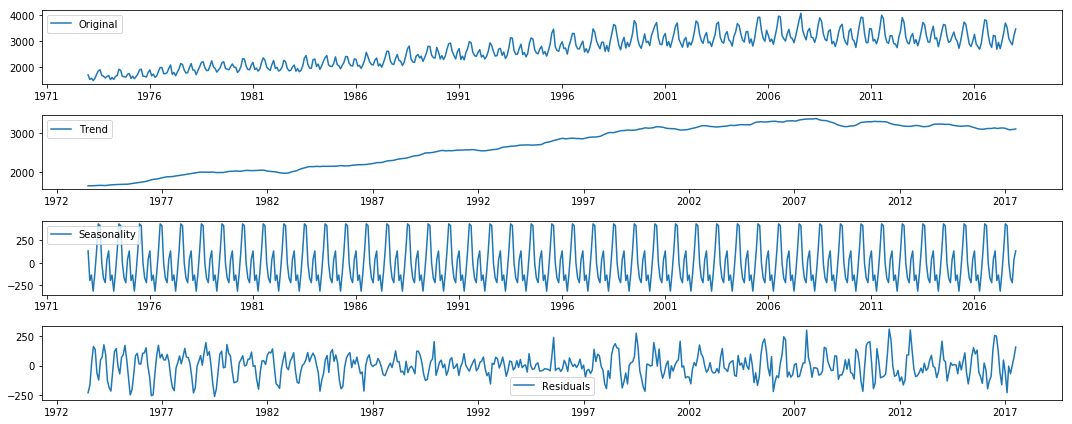

In [133]:
#Eliminating the trend and seasonality(Decomposing)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(elect)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(elect, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

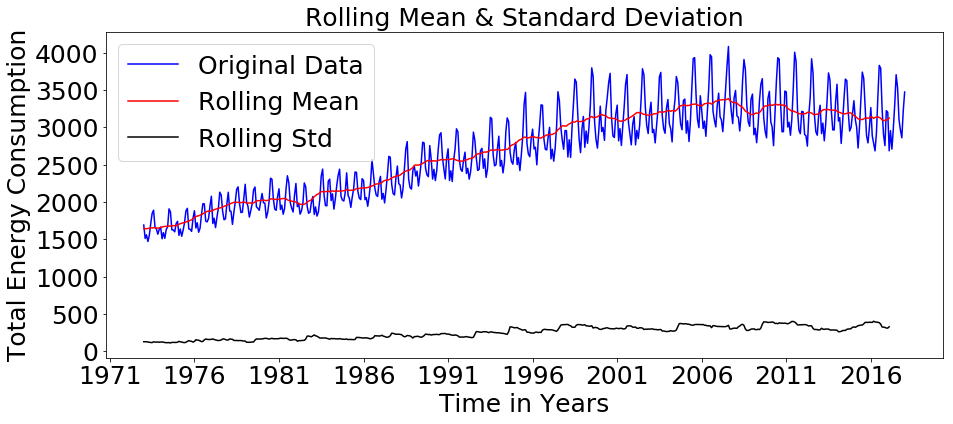

ValueError: too many values to unpack

In [134]:
#Let's check stationary residuals
elect_decompose = residual
elect_decompose.dropna(inplace=True)
TestStationaryPlot(elect_decompose)
TestStationaryAdfuller(elect_decompose)

# Electric Data For Texas

In [ ]:
#Revenue from retail sales of electricity : Texas : all sectors : monthly: ELEC.REV.TX-ALL.M
#Average retail price of electricity : Texas : residential : monthly:ELEC.PRICE.TX-RES.M 
#Average retail price of electricity : Texas : commercial : monthly: ELEC.PRICE.TX-COM.M
#Average retail price of electricity : Texas : industrial : monthly: ELEC.PRICE.TX-IND.M
#Average retail price of electricity : Texas : transportation : monthly: ELEC.PRICE.TX-TRA.M
#Revenue from retail sales of electricity : Texas : residential : monthly
#Revenue from retail sales of electricity : Texas : commercial : monthly:ELEC.REV.TX-COM.M
#Revenue from retail sales of electricity : Texas : industrial : monthly:ELEC.REV.TX-IND.M 
#Revenue from retail sales of electricity : Texas : transportation : monthly:ELEC.REV.TX-TRA.M
#Consumption for electricity generation (Btu) : coal : Texas : electric power (total) : monthly:ELEC.CONS_EG_BTU.COW-TX-98.M
#Consumption for electricity generation (Btu) : petroleum liquids : Texas : electric power (total) : monthly:ELEC.CONS_EG_BTU.PEL-TX-98.M
#Consumption for electricity generation (Btu) : petroleum coke : Texas : electric power (total) : monthly
#Consumption for electricity generation (Btu) : natural gas : Texas : electric power (total) : monthly: ELEC.CONS_EG_BTU.NG-TX-98.M
